In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy import cluster

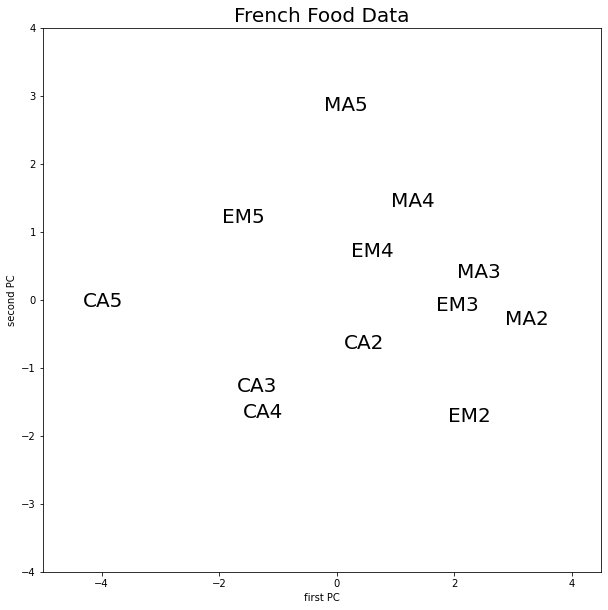

In [2]:
fooddat = pd.read_csv("food.dat", sep = "\s+", header=None, index_col = 0)
f = (fooddat - fooddat.mean())/fooddat.std()

mean = f.mean()
m = np.tile(mean, (len(f), 1))
x = f - m

eva = np.linalg.eig(np.cov(x.T))[0]
eve = np.linalg.eig(np.cov(x.T))[1]

y = x @ eve
ym = y.iloc[:, :2]

# Plot 1: PCA

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(-ym[0], ym[1], c = "w")
for i in range(0, len(ym)):
    ax.text(-ym.iloc[i,0], ym.iloc[i,1], x.index[i], fontsize = 20)
ax.set_xlabel("first PC")
ax.set_ylabel("second PC")
ax.set_ylim(-4, 4)
ax.set_xlim(-5, 4.5)
ax.set_title("French Food Data", fontsize = 20)
plt.show()

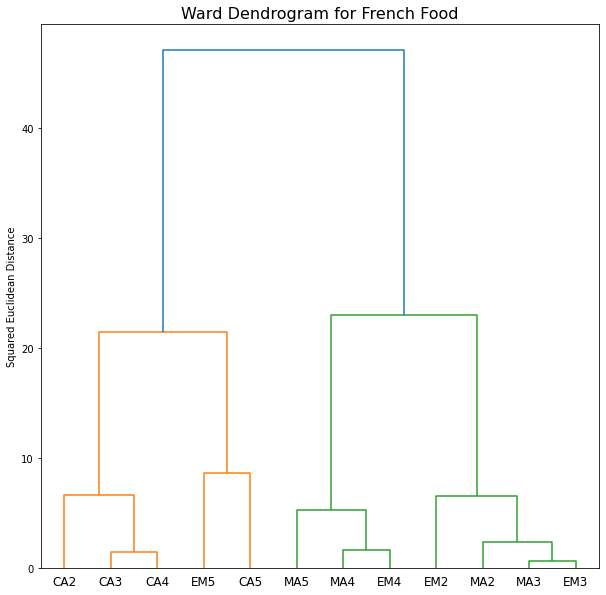

In [3]:
d = np.zeros([len(f),len(f)])

for i in range(0, len(f)):
    for j in range(0, len(f)):
        d[i, j] = np.linalg.norm(f.iloc[i, :] - f.iloc[j, :])

dd = (d**2)

ddd  = dd[1:, :-1][:, 0]
for i in range(1, len(f)-1):
    ddd = np.concatenate((ddd, dd[1:, :-1][i:, i]))
    
w = cluster.hierarchy.linkage(ddd, 'ward')

# Plot 2: Dendrogram for the standardized food.dat after Ward algorithm

fig, ax = plt.subplots(figsize = (10, 10))
h = cluster.hierarchy.dendrogram(w, labels=x.index)
plt.title("Ward Dendrogram for French Food", fontsize = 16)
plt.ylabel("Squared Euclidean Distance")

plt.show()

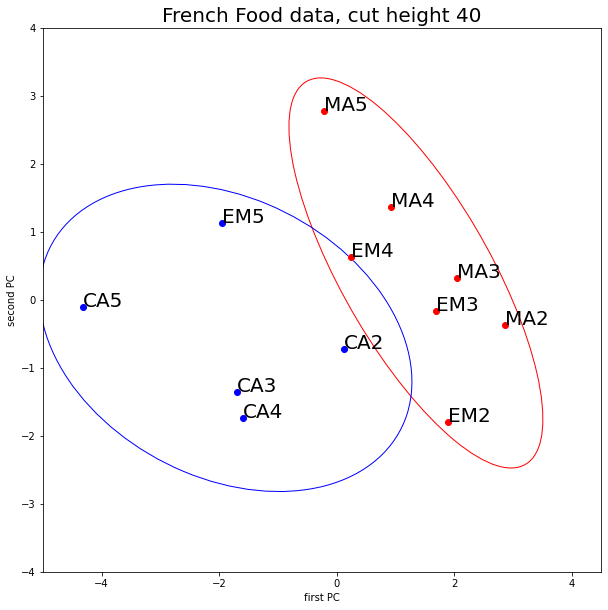

In [4]:
groups = cluster.hierarchy.cut_tree(w, height=40)

merg = np.concatenate((ym, groups), axis = 1)

merg = pd.DataFrame(merg).sort_values(by = 2)

merg1 = merg.iloc[:len(merg[merg.iloc[:, 2] == 0]), :2]
merg2 = merg.iloc[len(merg[merg.iloc[:, 2] == 0]):, :2]

covm = np.cov(merg1.iloc[:, 0], merg1.iloc[:, 1])
covm1 = np.cov(merg2.iloc[:, 0], merg2.iloc[:, 1])

eigva = np.sqrt(np.linalg.eig(covm)[0])
eigve = np.linalg.eig(covm)[1]
eigva1 = np.sqrt(np.linalg.eig(covm1)[0])
eigve1 = np.linalg.eig(covm1)[1]

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(-ym[0], ym[1], c = "w")
for i in range(0, len(ym)):
    ax.text(-ym.iloc[i,0], ym.iloc[i,1], x.index[i], fontsize = 20)

ax.add_patch(Ellipse(xy = (np.mean(-merg1.iloc[:, 0]), np.mean(merg1.iloc[:, 1])),
                     width = eigva[0]*4, height = eigva[1]*4,
                     angle = -np.rad2deg(np.arccos(eigve[0, 0])), 
                     edgecolor = "r", zorder = 0, fill = False))

ax.add_patch(Ellipse(xy = (np.mean(-merg2.iloc[:, 0]), np.mean(merg2.iloc[:, 1])),
                     width = eigva1[0]*4, height = eigva1[1]*4,
                     angle = -np.rad2deg(np.arccos(eigve1[0, 0])), 
                     edgecolor = "b", zorder = 0, fill = False))

ax.scatter(-merg1.iloc[:, 0], merg1.iloc[:, 1], c = "r")
ax.scatter(-merg2.iloc[:, 0], merg2.iloc[:, 1], c = "b")

ax.set_xlabel("first PC")
ax.set_ylabel("second PC")
ax.set_ylim(-4, 4)
ax.set_xlim(-5, 4.5)
ax.set_title("French Food data, cut height 40", fontsize = 20)

plt.show()